<a href="https://colab.research.google.com/github/rfeskov/NNT/blob/main/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_4_%D0%9F%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Архитектура систем классификации

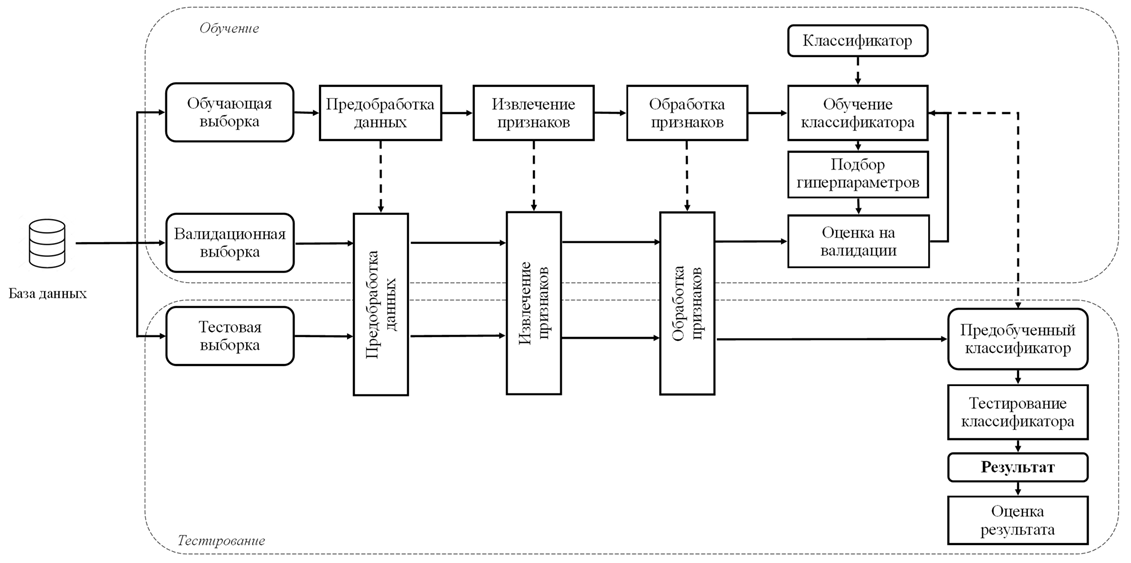

#Разделение данных на поднаборы

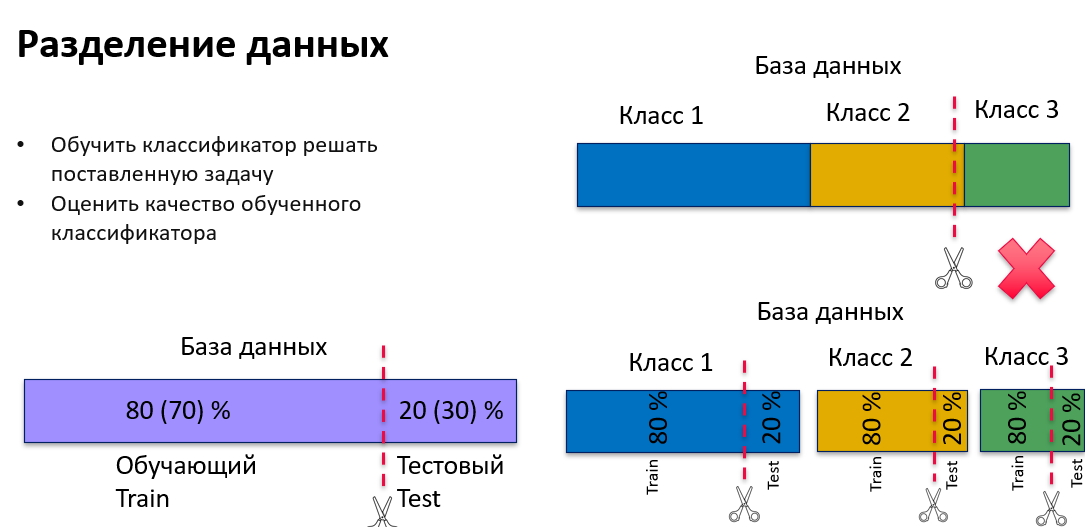

In [ ]:
import pandas as pd

In [ ]:
name = ['Вася', 'Шурик', 'Пушистик', 'Багира', 'Сева', 'Джек', 'Муся', 'Джесси', 'Раймонд', 'Барбара']
age = [7, 2, 5, 4, 8, 9, 1, 3, 6, 2]
wool= [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
df_cat = pd.DataFrame({'name': name, 'age':age, 'wool': wool})
df_cat

,name,age,wool
0,Вася,7,0
1,Шурик,2,0
2,Пушистик,5,0
3,Багира,4,1
4,Сева,8,1
5,Джек,9,1
6,Муся,1,1
7,Джесси,3,1
8,Раймонд,6,1
9,Барбара,2,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#выделяем из всех данных обучающую и тестовую
df_train, df_test = train_test_split(df_cat, test_size = 0.15, random_state = 42, stratify = df_cat['wool'])

In [ ]:
df_train

,name,age,wool
8,Раймонд,6,1
1,Шурик,2,0
0,Вася,7,0
4,Сева,8,1
3,Багира,4,1
5,Джек,9,1
9,Барбара,2,1
6,Муся,1,1


In [ ]:
df_test

,name,age,wool
2,Пушистик,5,0
7,Джесси,3,1


In [ ]:
len(df_train)

8

In [ ]:
len(df_test)

2

In [ ]:
#выделяем из обучающих данных обучающую и валидационную выборку
df_train, df_val = train_test_split(df_train, test_size = 0.15, random_state = 42, stratify = df_train['wool'])

In [ ]:
df_train

,name,age,wool
3,Багира,4,1
1,Шурик,2,0
8,Раймонд,6,1
5,Джек,9,1
6,Муся,1,1
4,Сева,8,1


In [ ]:
df_val

,name,age,wool
0,Вася,7,0
9,Барбара,2,1


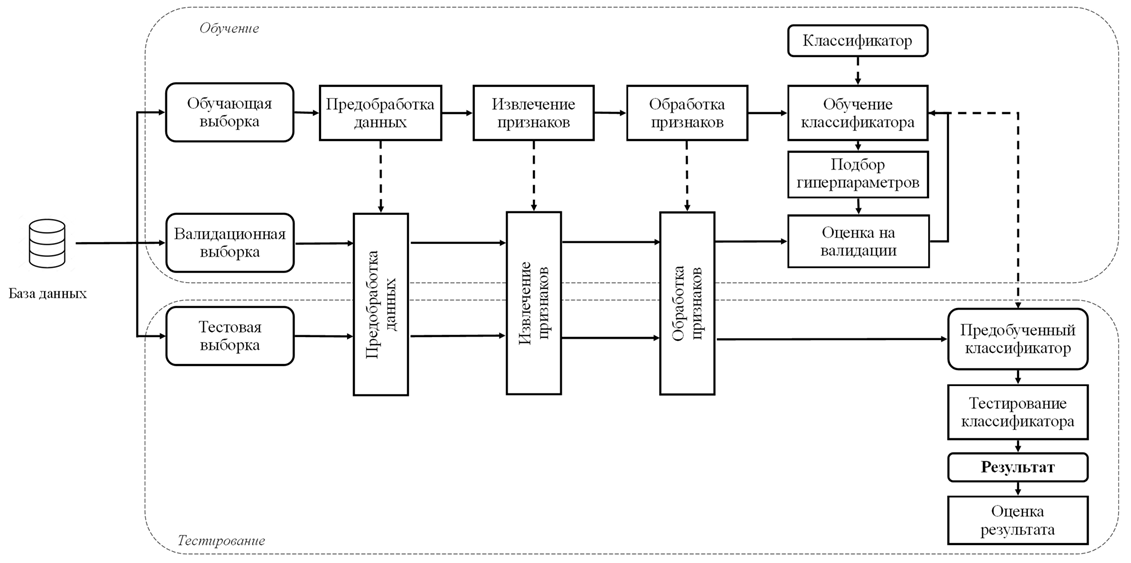

# **Предобработка**

**Предобработка** текстовых данных - это преобразование исходных данных, с целью выделить из них релевантную информацию.

Предобработка текстовых данных состоит из следующих этапов:


*   Удаление пунктуации
*   Приведение всех слов к нижнему регистру
*   Удаление стоп-слов и/или часто встречаемых
*   Токенизация
*   Нормализация (лемматизация и стемминг)
* и др...







## Токенизация

Токенизация - это разделение текста на значимые единицы

Что может являться значимой единицей для текста?

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#исходные текстовые данные
string = 'В последнее время университет поражает меня количеством мероприятий и конференций, которые организуются для студентов! Всё это развивает, приносит невероятную энергию и новые мысли! БУДЬТЕ АКТИВНЫ! Такое нельзя пропускать!'

In [ ]:
#токенизируем текст и записываем в отдельную переменную
tokens = word_tokenize(string)
print(tokens)

['В', 'последнее', 'время', 'университет', 'поражает', 'меня', 'количеством', 'мероприятий', 'и', 'конференций', ',', 'которые', 'организуются', 'для', 'студентов', '!', 'Всё', 'это', 'развивает', ',', 'приносит', 'невероятную', 'энергию', 'и', 'новые', 'мысли', '!', 'БУДЬТЕ', 'АКТИВНЫ', '!', 'Такое', 'нельзя', 'пропускать', '!']


## Удаление пунктуации

In [ ]:
from string import punctuation

In [ ]:
#записываем в переменную punctuations список существующих пунктуационных знаков
punctuations = list(punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:
#удаляем пунктуацию из наших токенов
tokens_without_punct = [i for i in tokens if i not in punctuations]
print(tokens_without_punct)

['В', 'последнее', 'время', 'университет', 'поражает', 'меня', 'количеством', 'мероприятий', 'и', 'конференций', 'которые', 'организуются', 'для', 'студентов', 'Всё', 'это', 'развивает', 'приносит', 'невероятную', 'энергию', 'и', 'новые', 'мысли', 'БУДЬТЕ', 'АКТИВНЫ', 'Такое', 'нельзя', 'пропускать']


In [ ]:
tokens_without_punct = []
for i in tokens:
  if i not in punctuations:
      tokens_without_punct.append(i)

## Понижение регистра слов

In [ ]:
low_tokens = [i.lower() for i in tokens_without_punct]
print(low_tokens)

['в', 'последнее', 'время', 'университет', 'поражает', 'меня', 'количеством', 'мероприятий', 'и', 'конференций', 'которые', 'организуются', 'для', 'студентов', 'всё', 'это', 'развивает', 'приносит', 'невероятную', 'энергию', 'и', 'новые', 'мысли', 'будьте', 'активны', 'такое', 'нельзя', 'пропускать']


## Удаление стоп-слов

Стоп-слова - это слова, не содержащие в себе смысловой нагрузки

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#записываем в переменную stopwords стоп-слова для русского языка
stopwords = nltk.corpus.stopwords.words('russian')
print(stopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

Все ли слова из этих подходят для задачи сентимент-анализа?

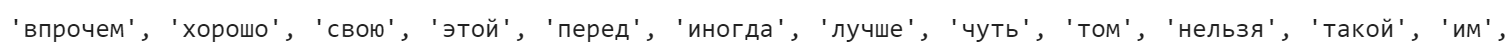

In [ ]:
#удаляем стоп-слова из нашего текста
words_without_stop = [i for i in low_tokens if i not in stopwords]
print(words_without_stop)

['последнее', 'время', 'университет', 'поражает', 'количеством', 'мероприятий', 'конференций', 'которые', 'организуются', 'студентов', 'всё', 'это', 'развивает', 'приносит', 'невероятную', 'энергию', 'новые', 'мысли', 'будьте', 'активны', 'такое', 'пропускать']


# Нормализация

Нормализация - приведение всех слов к единой форме.
Нормализация может быть осуществлена двумя методами:


*   Лемматизация
*   Стемминг



### Лемматизация

Лематизация - приведение всех слов к их начальной форме.

In [ ]:
!pip install pymorphy3 > None

In [ ]:
from pymorphy3 import MorphAnalyzer

In [ ]:
#записываем в morph лемматизатор
morph = MorphAnalyzer()

In [ ]:
#лемматизируем наш получившийся текст
lemms = [morph.parse(i)[0].normal_form for i in words_without_stop]
print(lemms)

['последний', 'время', 'университет', 'поражать', 'количество', 'мероприятие', 'конференция', 'который', 'организоваться', 'студент', 'всё', 'это', 'развивать', 'приносить', 'невероятный', 'энергия', 'новый', 'мысль', 'быть', 'активный', 'такой', 'пропускать']


In [ ]:
morph.parse('тыгыдыкает')

[Parse(word='тыгыдыкает', tag=OpencorporaTag('VERB,impf,tran sing,3per,pres,indc'), normal_form='тыгыдыкать', score=1.0, methods_stack=((FakeDictionary(), 'тыгыдыкает', 215, 5), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'ыкает')))]

In [ ]:
morph.parse('пила')

[Parse(word='пила', tag=OpencorporaTag('NOUN,inan,femn sing,nomn'), normal_form='пила', score=0.428571, methods_stack=((DictionaryAnalyzer(), 'пила', 55, 0),)),
 Parse(word='пила', tag=OpencorporaTag('VERB,impf,tran femn,sing,past,indc'), normal_form='пить', score=0.285714, methods_stack=((DictionaryAnalyzer(), 'пила', 465, 8),)),
 Parse(word='пила', tag=OpencorporaTag('NOUN,anim,masc,Name sing,gent'), normal_form='пил', score=0.142857, methods_stack=((DictionaryAnalyzer(), 'пила', 27, 1),)),
 Parse(word='пила', tag=OpencorporaTag('NOUN,anim,masc,Name sing,accs'), normal_form='пил', score=0.142857, methods_stack=((DictionaryAnalyzer(), 'пила', 27, 3),))]

### Стемминг

Стемминг - выделение основы слова

In [ ]:
from nltk.stem.snowball import RussianStemmer

In [ ]:
#записываем в stemmer функцию стемминга
stemmer = RussianStemmer()

In [ ]:
#проводим стемминг
stems = [stemmer.stem(i) for i in words_without_stop]
print(stems)

['последн', 'врем', 'университет', 'поража', 'количеств', 'мероприят', 'конференц', 'котор', 'организ', 'студент', 'все', 'эт', 'развива', 'принос', 'невероятн', 'энерг', 'нов', 'мысл', 'будьт', 'активн', 'так', 'пропуска']


Можно ли применять и лемматизацию и стемминг одновременно (последовательно)? Если да, то в каком порядке?

# Регулярные выражения

Регулярные выражения (англ. Regular expressions)— это строка, задающая шаблон поиска подстрок в тексте. Одному шаблону может соответствовать много разных строчек. Состоит из обычных символов и специальных командных последовательностей.

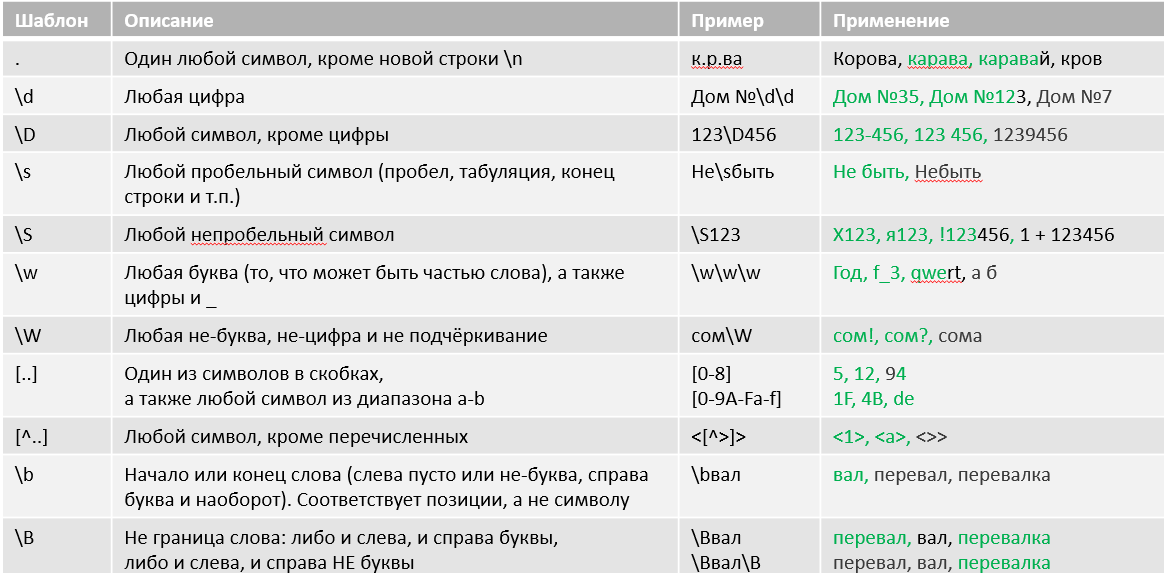

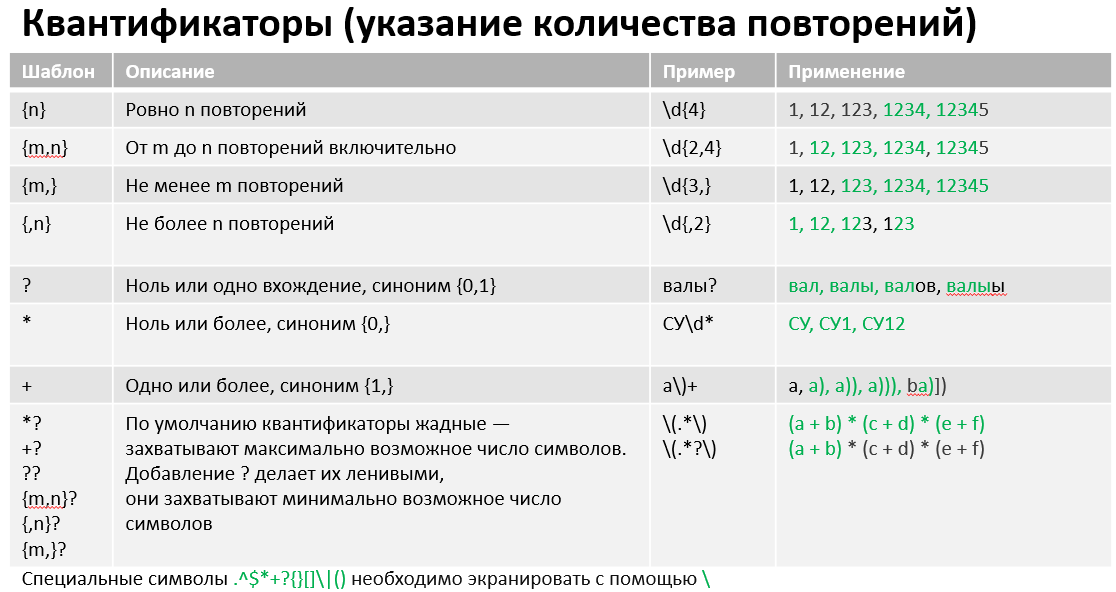

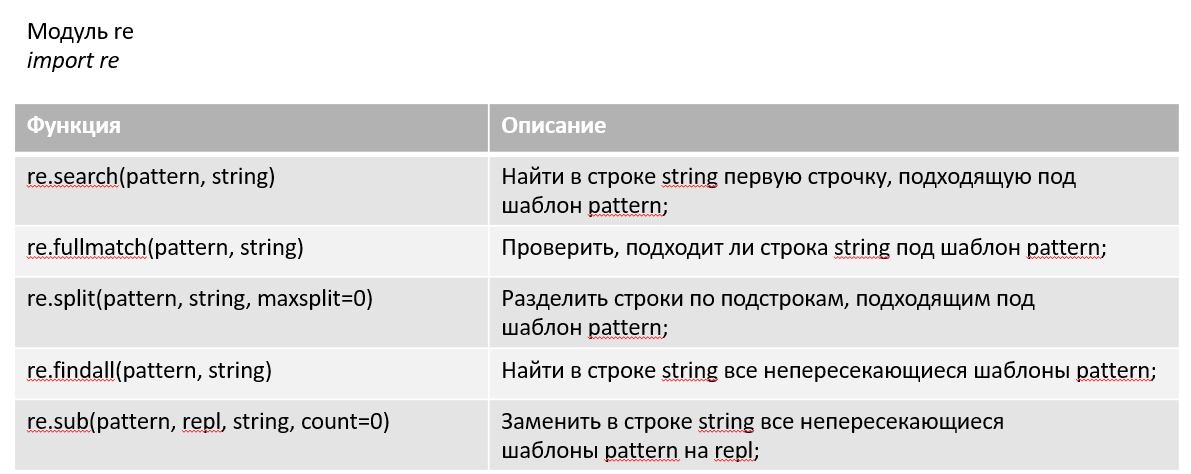

Документация модуля re https://docs.python.org/3/library/re.html

##Фильтрация русскоязычных символов

In [ ]:
import re

In [ ]:
text_example = "Привет, это тест 123  😂!  http://colab.research.google.com/ Hello, world! https://colab.research.google.com/"

In [ ]:
# Регулярное выражение для выбора русских символов
#pattern = r'[а-яА-ЯёЁ0-9]+' #
#Регулярное выражение, исключающее все англоязычные символы
pattern = r'[^a-zA-Z]+'

# Найти все совпадения
matches = re.findall(pattern, text_example)

# Объединить найденные символы в одну строку
result = ' '.join(matches)

print(result)

Привет, это тест 123  😂!   :// . . . /  ,  !  :// . . . /


##Удаление ссылок

In [ ]:
#Регулярное выражение нахождения ссылок https:\\ и http:\\
pattern = r'https?://\S*'

# Заменить все символы относящиеся к ссылке на пустую строку
result = re.sub(pattern, '', text_example)

print(result)

Привет, это тест 123  😂!   Hello, world! 


как удалить двойные пробелы?

##Удаление цифр

In [ ]:
#Регулярное выражение поиска всех цифр
pattern = r'[^0-9]'

# Найти все совпадения
matches = re.findall(pattern, text_example)

# Объединить найденные символы в одну строку
result = ''.join(matches)

print(result)

Привет, это тест   😂!  http://colab.research.google.com/ Hello, world! https://colab.research.google.com/


##Удаление эмотиконов и смайликов

1. [\U0001F600-\U0001F64F] - Этот диапазон включает в себя эмодзи лиц (например, улыбки, грустные лица и т.д.). Он охватывает коды от U+1F600 до U+1F64F.

2. [\U0001F300-\U0001F5FF] - Этот диапазон охватывает эмодзи предметов, таких как еда, природа, животные и т.д.

3. [\U00002700-\U000027BF] - В этом диапазоне находятся символы, такие как галочки и стрелки.

4. [\U0001F680-\U0001F6FF] - Сюда входят транспортные эмодзи и дорожные знаки.

5. [\U0001F1E6-\U0001F1FF] - Этот диапазон включает в себя флаги стран.

In [ ]:
# Регулярное выражение для удаления эмотиконов и смайликов
pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U00002700-\U000027BF\U0001F680-\U0001F6FF\U0001F1E6-\U0001F1FF]+'

# Замена смайлов на пустую строку
result = re.sub(pattern, '', text_example)

print(result)

Привет, это тест 123  !  http://colab.research.google.com/ Hello, world! https://colab.research.google.com/


##Может можно проще? Сделать все и сразу?

In [ ]:
# Регулярное выражение для выбора только русских символов
pattern = r'[а-яА-ЯёЁ]+'

# Найти все совпадения
matches = re.findall(pattern, text_example)

# Объединить найденные символы в одну строку
result = ' '.join(matches)

print(result)

Привет это тест


# Функции в Python

In [ ]:
punctuations = list(punctuation)
stopwords = nltk.corpus.stopwords.words('russian')
morph = MorphAnalyzer()

In [ ]:
#Пример функции предобработки текстов
#На вход подаем исходный текст
#на выходе получаем строку с предобработанным текстом
def preprocessing(text: str, punctuations: list = punctuations, stopwords: list = stopwords, morph: MorphAnalyzer = morph) -> str:
  tokens = word_tokenize(text.lower())
  tokens_without_punct = [i for i in tokens if i not in punctuations]
  lemms = [morph.parse(i)[0].normal_form for i in tokens_without_punct]
  words_without_stop = [i for i in lemms if i not in stopwords]
  cleaned_text = ' '.join(words_without_stop)
  return cleaned_text

In [ ]:
#пример предобработки одного текста
text_example = "Привет, это один из вариантов теста 123  😂!  http://colab.research.google.com/ Hello, world! https://colab.research.google.com/"
preprocessing(text_example)

'привет это вариант тест 123 😂 http //colab.research.google.com/ hello world https //colab.research.google.com/'

## Как выполнить предобработку всего корпуса текстов?

# Домашнее задание 4

1. Выделить таргетивную метку - популярности поста (по пороговому значению лайков\просмотров и репостов)
2. Разделить данные на обучающую, валидационную и тестовую выборку, использовать стратификацию по таргетивной метке.
3. Исходя из вашей бд подумать какие знаки пунктуации и стоп-слова необходимо удалить, помимо базовых. Удалять ли смайлики, эмотиконы, ссылки и пр.?
4. Составить функцию предобработки текстов на основе обучающего набора. Применить эту функцию к обучающему, валидациоонному и тестовому набору.
5. Добавить колонку в DataFrame с получившимся предобработанным текстом
6. Сохранить DataFrame в отдельном файле csv (Важно не пересохранить в предыдущий файл)

In [20]:
!pip install pymorphy3 > NULL

In [ ]:
import pandas as pd

# Загружаем из файла (например, "posts.csv")
data = pd.read_csv("real_football.csv")

# Проверим первые строки
print(data.head())


   id_post                       date  \
0    12279  2025-09-27 11:50:52+00:00   
1    12278  2025-09-27 11:47:44+00:00   
2    12277  2025-09-27 11:39:28+00:00   
3    12275  2025-09-27 11:18:29+00:00   
4    12274  2025-09-27 11:03:01+00:00   

                                                text  views  reactions  \
0  ГООООООООООООЛ!\n\n🏴 Брентфорд 2:0 Ман Юнайтед...   1833         44   
1  💪 И офсайдная ловушка от Магуайра на уровне\n\...   2511         40   
2  ГООООООООООООЛ!\n\n🏴󠁧󠁢󠁥󠁮󠁧󠁿 Брентфорд 1:0 Ман Ю...   3601         82   
3  🏆 Итоги голосования за приз Копа – **Ламин** *...   5021         93   
4  💪 Нуну может возглавить «Вест Хэм»\n\n✈️ [**Фу...   5595         31   

   comments  
0        21  
1         5  
2        19  
3         7  
4         1  


In [21]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

print(len(train_df), len(val_df), len(test_df))



6989 1748 2185


In [22]:
import re
import nltk
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer

nltk.download("stopwords")
stop_words = set(stopwords.words("russian"))
morph = MorphAnalyzer()

# Регулярки
emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F'
                           r'\U0001F300-\U0001F5FF'
                           r'\U00002700-\U000027BF'
                           r'\U0001F680-\U0001F6FF'
                           r'\U0001F1E6-\U0001F1FF]+', flags=re.UNICODE)

url_pattern = re.compile(r'https?://\S+')
mention_pattern = re.compile(r'[@#]\w+')

# --- Регулярка для "ГОООООООЛ" и подобных ---
# Объяснение:
# - г  — буква г
# - о{2,} — две или более букв "о"
# - л — буква л
# \b — границы слова
goal_pattern = re.compile(r'\bг+о{2,}л+\b', flags=re.IGNORECASE | re.UNICODE)

def preprocess_text(text):
    text = text.lower()
    text = emoji_pattern.sub("", text)
    text = url_pattern.sub("", text)
    text = mention_pattern.sub("", text)

    # нормализация криков "ГОООООООЛ" → "гооол"
    text = goal_pattern.sub("гооол", text)

    # убираем всё, кроме русских букв и пробелов
    text = re.sub(r"[^а-яё\s]", " ", text)

    words = text.split()
    words = [w for w in words if w not in stop_words and len(w) > 2]
    lemmas = [morph.parse(w)[0].normal_form for w in words]
    return " ".join(lemmas)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
data.head()

,id_post,date,text,views,reactions,comments
0,12279,2025-09-27 11:50:52+00:00,ГООООООООООООЛ!\n\n🏴 Брентфорд 2:0 Ман Юнайтед...,1833,44,21
1,12278,2025-09-27 11:47:44+00:00,💪 И офсайдная ловушка от Магуайра на уровне\n\...,2511,40,5
2,12277,2025-09-27 11:39:28+00:00,ГООООООООООООЛ!\n\n🏴󠁧󠁢󠁥󠁮󠁧󠁿 Брентфорд 1:0 Ман Ю...,3601,82,19
3,12275,2025-09-27 11:18:29+00:00,🏆 Итоги голосования за приз Копа – **Ламин** *...,5021,93,7
4,12274,2025-09-27 11:03:01+00:00,💪 Нуну может возглавить «Вест Хэм»\n\n✈️ [**Фу...,5595,31,1


In [24]:
train_df["clean_text"] = train_df["text"].apply(preprocess_text)
val_df["clean_text"] = val_df["text"].apply(preprocess_text)
test_df["clean_text"] = test_df["text"].apply(preprocess_text)


In [25]:
train_df.head()

,id_post,date,text,views,reactions,comments,clean_text
1070,11165,2025-08-30 20:09:32+00:00,ГОООООООООООООЛ!\n\n🇪🇸Реал Мадрид 2:1 Мальорка...,15665,106,12,гооол реал мадрид мальорк винисиус
5585,6343,2025-04-13 09:50:48+00:00,🔥 После матча с «Лионом» место под Онана зашат...,13812,99,6,матч лион место онана зашататься футбол
5907,6009,2025-04-02 08:03:06+00:00,🤯 Такие пенальти могут ставить только Аргентин...,13346,202,20,такой пенальти мочь ставить аргентина футбол
548,11706,2025-09-13 18:25:00+00:00,🏴 «Тоттенхэм» победил в лондонском дерби\n\n✈️...,14891,122,3,тоттенхэма победить лондонский дерби футбол
6777,5100,2025-03-03 18:08:19+00:00,🇭🇷** **39-летний Модрич вызван в сборную на че...,15018,196,8,летний модрич вызвать сборная четвертьфинал ли...


In [26]:
val_df.head()

,id_post,date,text,views,reactions,comments,clean_text
4081,7932,2025-05-30 20:33:06+00:00,😄 Фанаты «Галатасарая» вывесили огромный банне...,16769,93,6,фанат галатасарай вывесить огромный баннер над...
7337,4502,2025-02-13 09:03:06+00:00,🇬🇧 У «Арсенала» поломались все основные напада...,14277,101,11,арсенал поломаться основной нападать букайо са...
10819,112,2021-12-17 19:00:51+00:00,**✊🏻 Криштиану считает так!\n\n**[IE Football]...,7346,0,89,криштиану считать
821,11423,2025-09-06 17:08:52+00:00,ГООООООООООООЛ!\n\n🇦🇲 Армения 0:4 Португалия 🇵...,16945,186,30,гооол армения португалия роналда
10026,1132,2023-04-27 15:14:35+00:00,**😱**** АААААААА! ВОТ ЭТО ПРИВОЗ ОТ ДЖЕРРАРДА!...,12635,192,26,аааааааа это привоз джеррард нападать челси де...


In [27]:
test_df.head()

,id_post,date,text,views,reactions,comments,clean_text
2271,9866,2025-07-26 06:33:01+00:00,"⚽️ Лукас Пакета будет оправдан по делам, связа...",15346,100,2,лукас пакет оправдать дело связанный ставка до...
8697,2996,2024-12-23 09:03:06+00:00,👏 Как же хорош «Ливерпуль»\n\n✈️ [**Футбол24**...,15517,186,2,хороший ливерпуль футбол
3753,8277,2025-06-08 20:44:08+00:00,"❗️ 83' Сумасшедший удар от Иско, но Кошта сейв...",17182,116,6,сумасшедший удар иско кошт сейвит футбол
8664,3030,2024-12-26 13:07:53+00:00,ГОООООООООООООООООЛ!\n\n🇬🇧 Ман Сити 1:1 Эверто...,14297,201,19,гооол ман сити эвертон ндиать
4441,7540,2025-05-19 14:03:01+00:00,😱 У «Барсы» могут отобрать титул?\n\nЕсли жало...,15788,197,70,барс мочь отобрать титул жалоба удовлетворить ...


In [29]:
train_df.to_csv("football_train_clean.csv", index=False)
val_df.to_csv("football_val_clean.csv", index=False)
test_df.to_csv("football_test_clean.csv", index=False)
